In [10]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
# Define functions to read accuracy data
def consumption_architecture(start_character, entire_line):
  ca_live = False
  result = ""
  for index,_ in enumerate(entire_line):
    if (_ == start_character):
      break
  index = index + 1
  while (entire_line[index] != " "):
    result = f"{result}{entire_line[index]}"
    index = index + 1
  return float(result)

def make_pandas(file_path):
  for_pandas = []
  column_headers = ["master", "thermal", "center", "width", "tpwn", "Accuracy"]
  for_pandas.append(column_headers)

  with open(file_path, mode = "r") as file:
    for line in file:
      line_statistics = []
      line_statistics.append(int(consumption_architecture("m", line)))
      line_statistics.append(int(consumption_architecture("t", line)))
      line_statistics.append(int(consumption_architecture("c", line)))
      line_statistics.append(int(consumption_architecture("w", line)))
      line_statistics.append(int(consumption_architecture("n", line)))
      line_statistics.append(consumption_architecture("A", line))
      for_pandas.append(line_statistics)

  actual_pandas = pd.DataFrame(for_pandas[1:], columns = for_pandas[0])

  return actual_pandas

In [12]:
# Create table needed for plotting
base_path = "/content/random_forest_results/"
thermal_noises = ['0', '1', '2', '4', '10']

final_table = []
x = np.linspace(500, 3700, 33)

final_table.append(x)

for t in thermal_noises:
    name = f"m0_t{t}.txt"
    df = make_pandas(f"{base_path}{name}")
    df_trimmed = df[(df['width'] == 50) & (df['tpwn'] == 10)]
    final_table.append(df_trimmed['Accuracy'].to_list())

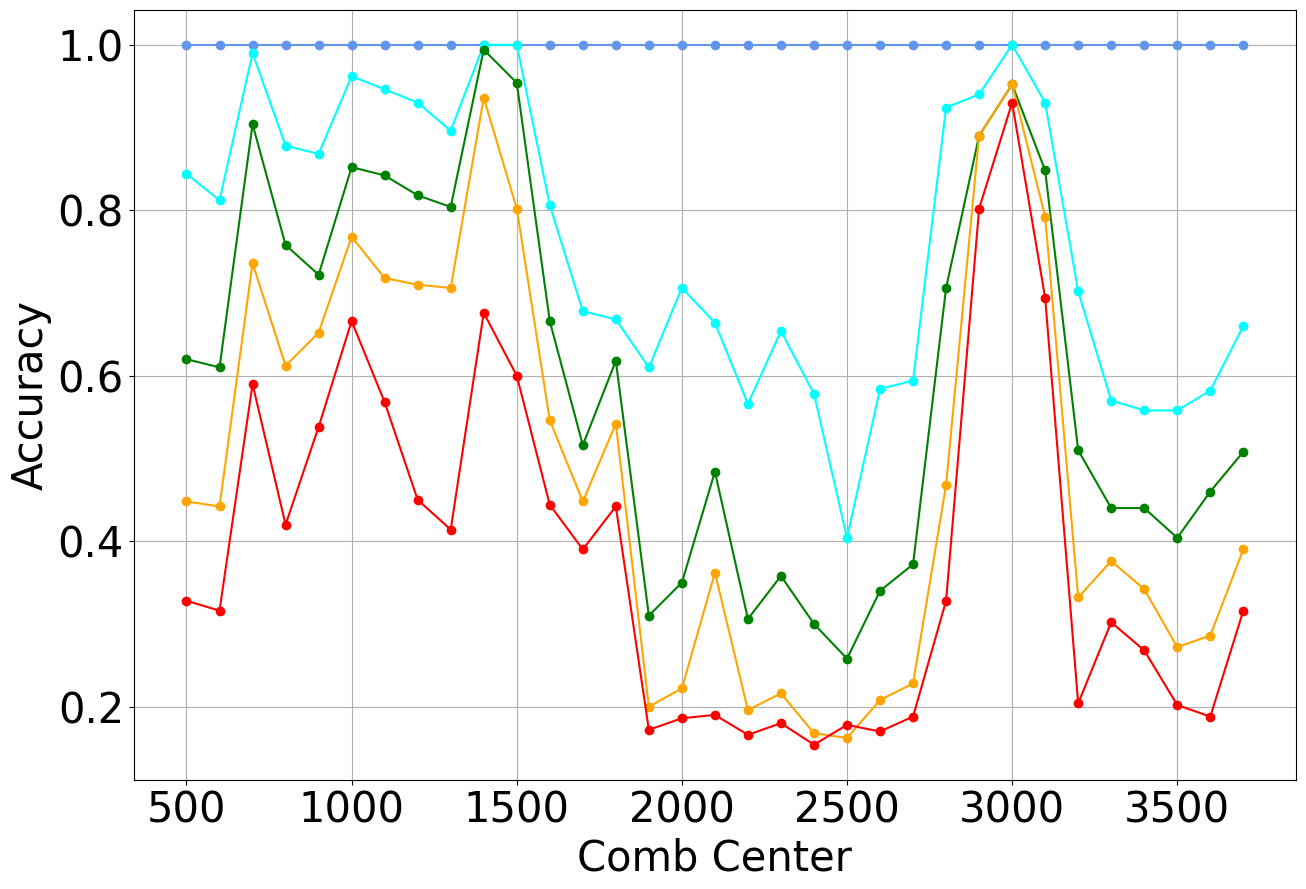

In [14]:
# Plot graphs
figure = plt.figure(figsize = (15, 10))
axes = figure.add_subplot(1, 1, 1)

axes.tick_params(labelsize = 30)
axes.set_xlabel("Comb Center", fontsize = 30)
axes.set_ylabel("Accuracy", fontsize = 30)

axes.plot(final_table[0], final_table[1], color = "cornflowerblue", marker = "o", label = "Thermal 0")
axes.plot(final_table[0], final_table[2], color = "cyan", marker = "o", label = "Thermal 1")
axes.plot(final_table[0], final_table[3], color = "green", marker = "o", label = "Thermal 2")
axes.plot(final_table[0], final_table[4], color = "orange", marker = "o", label = "Thermal 4")
axes.plot(final_table[0], final_table[5], color = "red", marker = "o", label = "Thermal 10")
axes.grid()